In [136]:
import numpy as np  
import pandas as pd  
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from keras.datasets import mnist    
np.random.seed(10)  

(X_train_image, y_train_label), (X_test_image, y_test_label) = mnist.load_data()  
print("\t[Info] train data=",len(X_train_image))  
print("\t[Info] test  data=",len(X_test_image))  

	[Info] train data= 60000
	[Info] test  data= 10000


In [137]:
print("\t[Info] Shape of train data=%s" % (str(X_train_image.shape)))  
print("\t[Info] Shape of train label=%s" % (str(y_train_label.shape)))  
#訓練資料是由 images 與 labels 所組成共有 60,000 筆, 每一筆代表某個數字的影像為 28x28 pixels.

	[Info] Shape of train data=(60000, 28, 28)
	[Info] Shape of train label=(60000,)


In [138]:
import matplotlib.pyplot as plt  
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary') # cmap='binary' 參數設定以黑白灰階顯示.  
    plt.show()  

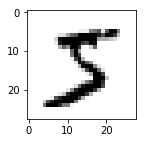

In [139]:
 plot_image(X_train_image[0])

In [140]:
y_train_label[0]

5

In [171]:
#建立 plot_images_labels_predict 函數, 可以顯示多筆資料的影像與 label. 
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14) 
    if num > 25: 
        num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0: 
            
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1 
    plt.show() 
   

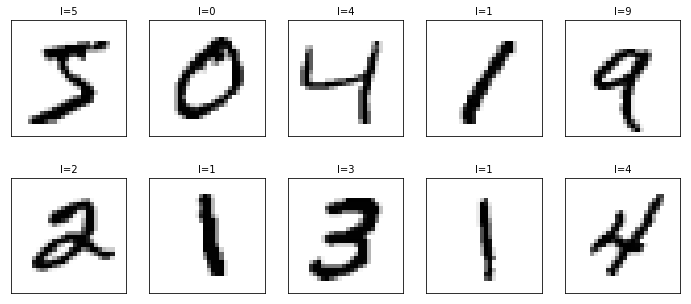

In [172]:
#查看test dataset前十筆圖片：因為目前我們還沒有預測值，所以prediction傳入空陣列[]
plot_images_labels_predict(X_train_image, y_train_label, [], 0, 10)

In [8]:
#首先將 image 以 reshape 轉換為二維 ndarray 並進行 normalization (Feature scaling)
x_Train = X_train_image.reshape(60000, 28*28).astype('float32')  
x_Test = X_test_image.reshape(10000, 28*28).astype('float32')  
print("\t[Info] xTrain: %s" % (str(x_Train.shape)))  
print("\t[Info] xTest: %s" % (str(x_Test.shape)))  
  
#每個像素是0-255的值，首先做一下歸一化，將所有值除以255，得到一個0-1的值
x_Train_norm = x_Train/255  
x_Test_norm = x_Test/255  

	[Info] xTrain: (60000, 784)
	[Info] xTest: (10000, 784)


In [326]:
from keras.models import Sequential  
from keras.layers import Dense  
  
model = Sequential()  # Build Linear Model  
#normal 使用常態分的亂數來初始化weight權重及bias偏差。
model.add(Dense(units=100, input_dim=784, kernel_initializer='normal', activation='sigmoid')) # Add Input/hidden layer  
model.add(Dense(units=150,kernel_initializer='normal', activation='sigmoid'))# Add hidden layer 
model.add(Dense(units=150,kernel_initializer='normal', activation='sigmoid'))# Add hidden layer 
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax')) # Add Hidden/output layer  
print("\t[Info] Model summary:")  
model.summary()  
print("")  
#Param是超參數Hyper-Parameters，指由這層神經元所產生的參數
#Y=activation(X x W + b) 即輸出=激活函數(輸入 x 權重 + 偏差)。

	[Info] Model summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_62 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_63 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_64 (Dense)             (None, 10)                1510      
Total params: 117,810
Trainable params: 117,810
Non-trainable params: 0
_________________________________________________________________



In [327]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)#將 training 的 label 進行 one-hot encoding
y_TestOneHot = np_utils.to_categorical(y_test_label) #將測試的 labels 進行 one-hot encoding
y_train_label[0] #檢視 training labels 第一個 label 的值


5

In [328]:
y_TrainOneHot[:1]#檢視第一個 label 在 one-hot encoding 後的結果, 會在第六個位置上為 1, 其他位置上為 0

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

In [329]:
#在訓練模型之前, 我們必須先使用 compile 方法, 對訓練模型進行設定
#loss: 設定 loss function, 在深度學習通常使用 cross_entropy (Cross entropy) 交叉摘順練效果較好.
#optimizer: 設定訓練時的優化方法sgd
#metrics: 設定評估模型的方式是 accuracy (準確率)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])  

In [330]:
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)
#x=x_Train_norm: features 數字的影像特徵值 (60,000 x 784 的陣列).
#y=y_Train_OneHot: label 數字的 One-hot encoding 陣列 (60,000 x 10 的陣列)
#validation_split = 0.2: 設定訓練資料與 cross validation 的資料比率.
#也就是說會有 0.8 * 60,000 = 48,000 作為訓練資料; 0.2 * 60,000 = 12,000 作為驗證資料.
#epochs = 10: 執行 10 次的訓練週期.
#batch_size = 200: 每一批次的訓練筆數為 200
#verbose = 2: 顯示訓練過程. 共執行 10 次 epoch (訓練週期), 每批 200 筆, 
#也就是每次會有 240 round (48,000 / 200 = 240). 每一次的 epoch 會計算 accuracy 並記錄在 train_history 中.

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 2.3039 - acc: 0.1098 - val_loss: 2.3018 - val_acc: 0.1060
Epoch 2/10
 - 1s - loss: 2.3010 - acc: 0.1138 - val_loss: 2.3024 - val_acc: 0.1060
Epoch 3/10
 - 1s - loss: 2.3011 - acc: 0.1136 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 4/10
 - 1s - loss: 2.3011 - acc: 0.1143 - val_loss: 2.3019 - val_acc: 0.1060
Epoch 5/10
 - 1s - loss: 2.3010 - acc: 0.1142 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 6/10
 - 1s - loss: 2.3009 - acc: 0.1140 - val_loss: 2.3013 - val_acc: 0.1060
Epoch 7/10
 - 1s - loss: 2.3006 - acc: 0.1149 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 8/10
 - 1s - loss: 2.3007 - acc: 0.1144 - val_loss: 2.3017 - val_acc: 0.1060
Epoch 9/10
 - 1s - loss: 2.3005 - acc: 0.1135 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 10/10
 - 1s - loss: 2.3006 - acc: 0.1138 - val_loss: 2.3013 - val_acc: 0.1060


In [331]:
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

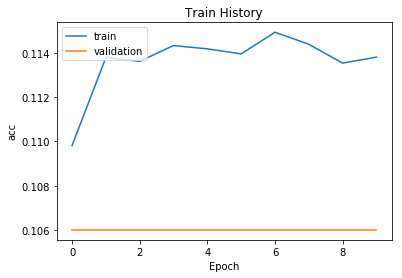

In [332]:
show_train_history(train_history, 'acc', 'val_acc') 
#如果 "acc 訓練的準確率" 一直提升, 但是 "val_acc 的準確率" 卻一直沒有增加, 就有可能是 Overfitting 的現象

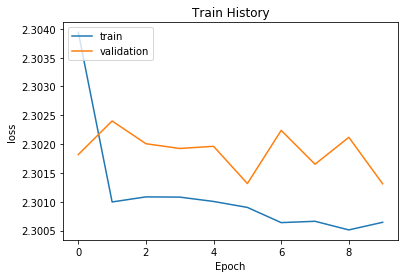

In [333]:
show_train_history(train_history, 'loss', 'val_loss')  

In [334]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  

10000/10000 [==============================] - 0s 46us/step

	[Info] Accuracy of testing data = 11.3%


	[Info] Making prediction to x_Test_norm

	[Info] Show 10 prediction result (From 240):
[1 1 1 1 1 1 1 1 1 1]



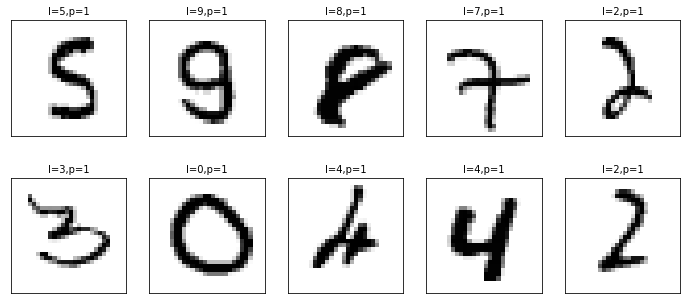

In [335]:
print("\t[Info] Making prediction to x_Test_norm")  
prediction = model.predict_classes(x_Test_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))  
  
plot_images_labels_predict(X_test_image, y_test_label, prediction, idx=240)  

In [336]:
print("\t[Info] Display Confusion Matrix:")  
import pandas as pd  
print("%s\n" % pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['predict']))   


	[Info] Display Confusion Matrix:
predict     1
label        
0         980
1        1135
2        1032
3        1010
4         982
5         892
6         958
7        1028
8         974
9        1009

